In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/train.npz"
val = "Data/readelf/val.npz"
test = "Data/readelf/test.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x']
y_train = training_dataset['y']

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (1200, 3840, 64) (1200, 3840, 64)
Validation shape:  (400, 3840, 64) (400, 3840, 64)
Test shape:  (400, 3840, 64) (400, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, batch_input_shape=(100, 3840, 64), return_sequences=True, stateful=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mae', 'mse'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (100, 3840, 64)           33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1200 samples, validate on 400 samples
Epoch 1/500
1200/1200 [==============================] - 67s 56ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_squared_error: 0.0107 - val_loss: 0.0303 - val_mean_absolute_error: 0.0303 - val_mean_squared_error: 0.0058
Epoch 2/500
1200/1200 [==============================] - 58s 49ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_squared_error: 0.0096 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_squared_error: 0.0052
Epoch 3/500
1200/1200 [==============================] - 57s 48ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_squared_error: 0.0087 - val_loss: 

1200/1200 [==============================] - 56s 47ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_squared_error: 0.0024 - val_loss: 0.0136 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 0.0013
Epoch 35/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_squared_error: 0.0023 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 0.0012
Epoch 36/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_squared_error: 0.0023 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 0.0012
Epoch 37/500
1200/1200 [==============================] - 58s 49ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_squared_error: 0.0023 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 0.0012
Epoch 38/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.019

Epoch 69/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_squared_error: 0.0015 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_squared_error: 6.9894e-04
Epoch 70/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_squared_error: 0.0015 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_squared_error: 6.8960e-04
Epoch 71/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_squared_error: 0.0015 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_squared_error: 6.8050e-04
Epoch 72/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_squared_error: 0.0014 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_squared_error: 6.7159e-04
Epoch 73/500
1200/1200 [==============================] 

Epoch 104/500
1200/1200 [==============================] - 58s 49ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_squared_error: 0.0011 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_squared_error: 4.7126e-04
Epoch 105/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_squared_error: 0.0011 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_squared_error: 4.6695e-04
Epoch 106/500
1200/1200 [==============================] - 57s 47ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_squared_error: 0.0011 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_squared_error: 4.6274e-04
Epoch 107/500
1200/1200 [==============================] - 56s 47ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_squared_error: 0.0011 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_squared_error: 4.5861e-04
Epoch 108/500
1200/1200 [===========================

1200/1200 [==============================] - 58s 49ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_squared_error: 9.6187e-04 - val_loss: 0.0050 - val_mean_absolute_error: 0.0050 - val_mean_squared_error: 3.6376e-04
Epoch 139/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_squared_error: 9.5848e-04 - val_loss: 0.0049 - val_mean_absolute_error: 0.0049 - val_mean_squared_error: 3.6153e-04
Epoch 140/500
1200/1200 [==============================] - 61s 51ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_squared_error: 9.5515e-04 - val_loss: 0.0049 - val_mean_absolute_error: 0.0049 - val_mean_squared_error: 3.5933e-04
Epoch 141/500
1200/1200 [==============================] - 60s 50ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_squared_error: 9.5188e-04 - val_loss: 0.0049 - val_mean_absolute_error: 0.0049 - val_mean_squared_error: 3.5718e-04
Epoch 142/500
1200/1200 [=========================

1200/1200 [==============================] - 58s 48ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_squared_error: 8.7484e-04 - val_loss: 0.0038 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 3.0585e-04
Epoch 173/500
1200/1200 [==============================] - 61s 51ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_squared_error: 8.7297e-04 - val_loss: 0.0038 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 3.0460e-04
Epoch 174/500
1200/1200 [==============================] - 60s 50ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_squared_error: 8.7113e-04 - val_loss: 0.0038 - val_mean_absolute_error: 0.0038 - val_mean_squared_error: 3.0336e-04
Epoch 175/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_squared_error: 8.6932e-04 - val_loss: 0.0037 - val_mean_absolute_error: 0.0037 - val_mean_squared_error: 3.0214e-04
Epoch 176/500
1200/1200 [=========================

1200/1200 [==============================] - 57s 48ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_squared_error: 8.2524e-04 - val_loss: 0.0030 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 2.7201e-04
Epoch 207/500
1200/1200 [==============================] - 61s 51ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_squared_error: 8.2413e-04 - val_loss: 0.0030 - val_mean_absolute_error: 0.0030 - val_mean_squared_error: 2.7125e-04
Epoch 208/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_squared_error: 8.2303e-04 - val_loss: 0.0029 - val_mean_absolute_error: 0.0029 - val_mean_squared_error: 2.7049e-04
Epoch 209/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_squared_error: 8.2196e-04 - val_loss: 0.0029 - val_mean_absolute_error: 0.0029 - val_mean_squared_error: 2.6974e-04
Epoch 210/500
1200/1200 [=========================

1200/1200 [==============================] - 59s 49ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_squared_error: 7.9499e-04 - val_loss: 0.0023 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 2.5088e-04
Epoch 241/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_squared_error: 7.9430e-04 - val_loss: 0.0023 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 2.5039e-04
Epoch 242/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_squared_error: 7.9361e-04 - val_loss: 0.0023 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 2.4990e-04
Epoch 243/500
1200/1200 [==============================] - 60s 50ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_squared_error: 7.9293e-04 - val_loss: 0.0023 - val_mean_absolute_error: 0.0023 - val_mean_squared_error: 2.4942e-04
Epoch 244/500
1200/1200 [=========================

1200/1200 [==============================] - 58s 49ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_squared_error: 7.7566e-04 - val_loss: 0.0019 - val_mean_absolute_error: 0.0019 - val_mean_squared_error: 2.3713e-04
Epoch 275/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_squared_error: 7.7521e-04 - val_loss: 0.0018 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 2.3681e-04
Epoch 276/500
1200/1200 [==============================] - 60s 50ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_squared_error: 7.7476e-04 - val_loss: 0.0018 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 2.3649e-04
Epoch 277/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_squared_error: 7.7432e-04 - val_loss: 0.0018 - val_mean_absolute_error: 0.0018 - val_mean_squared_error: 2.3617e-04
Epoch 278/500
1200/1200 [=========================

1200/1200 [==============================] - 58s 48ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_squared_error: 7.6304e-04 - val_loss: 0.0015 - val_mean_absolute_error: 0.0015 - val_mean_squared_error: 2.2805e-04
Epoch 309/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_squared_error: 7.6274e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.2784e-04
Epoch 310/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_squared_error: 7.6245e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.2763e-04
Epoch 311/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_squared_error: 7.6216e-04 - val_loss: 0.0014 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.2742e-04
Epoch 312/500
1200/1200 [=========================

1200/1200 [==============================] - 57s 47ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_squared_error: 7.5477e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2208e-04
Epoch 343/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_squared_error: 7.5458e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2194e-04
Epoch 344/500
1200/1200 [==============================] - 57s 48ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_squared_error: 7.5439e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2180e-04
Epoch 345/500
1200/1200 [==============================] - 56s 47ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_squared_error: 7.5420e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0011 - val_mean_squared_error: 2.2167e-04
Epoch 346/500
1200/1200 [=========================

1200/1200 [==============================] - 56s 47ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_squared_error: 7.4955e-04 - val_loss: 9.0007e-04 - val_mean_absolute_error: 9.0007e-04 - val_mean_squared_error: 2.1832e-04
Epoch 376/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_squared_error: 7.4942e-04 - val_loss: 8.9254e-04 - val_mean_absolute_error: 8.9254e-04 - val_mean_squared_error: 2.1823e-04
Epoch 377/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_squared_error: 7.4930e-04 - val_loss: 8.8638e-04 - val_mean_absolute_error: 8.8638e-04 - val_mean_squared_error: 2.1814e-04
Epoch 378/500
1200/1200 [==============================] - 54s 45ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_squared_error: 7.4917e-04 - val_loss: 8.7972e-04 - val_mean_absolute_error: 8.7972e-04 - val_mean_squared_error: 2.1805e-04
Epoch 379/500
1200

Epoch 408/500
1200/1200 [==============================] - 57s 48ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_squared_error: 7.4619e-04 - val_loss: 7.0955e-04 - val_mean_absolute_error: 7.0955e-04 - val_mean_squared_error: 2.1593e-04
Epoch 409/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_squared_error: 7.4611e-04 - val_loss: 7.0644e-04 - val_mean_absolute_error: 7.0644e-04 - val_mean_squared_error: 2.1588e-04
Epoch 410/500
1200/1200 [==============================] - 55s 46ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_squared_error: 7.4604e-04 - val_loss: 6.9922e-04 - val_mean_absolute_error: 6.9922e-04 - val_mean_squared_error: 2.1582e-04
Epoch 411/500
1200/1200 [==============================] - 57s 47ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_squared_error: 7.4596e-04 - val_loss: 6.9659e-04 - val_mean_absolute_error: 6.9659e-04 - val_mean_squared_error: 2.1577e-04
Epoc

Epoch 441/500
1200/1200 [==============================] - 58s 48ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_squared_error: 7.4410e-04 - val_loss: 5.7121e-04 - val_mean_absolute_error: 5.7121e-04 - val_mean_squared_error: 2.1448e-04
Epoch 442/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_squared_error: 7.4405e-04 - val_loss: 5.6717e-04 - val_mean_absolute_error: 5.6717e-04 - val_mean_squared_error: 2.1444e-04
Epoch 443/500
1200/1200 [==============================] - 61s 50ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_squared_error: 7.4400e-04 - val_loss: 5.6283e-04 - val_mean_absolute_error: 5.6283e-04 - val_mean_squared_error: 2.1441e-04
Epoch 444/500
1200/1200 [==============================] - 61s 51ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_squared_error: 7.4396e-04 - val_loss: 5.6165e-04 - val_mean_absolute_error: 5.6165e-04 - val_mean_squared_error: 2.1438e-04
Epoc

Epoch 474/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_squared_error: 7.4282e-04 - val_loss: 4.6645e-04 - val_mean_absolute_error: 4.6645e-04 - val_mean_squared_error: 2.1361e-04
Epoch 475/500
1200/1200 [==============================] - 59s 49ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_squared_error: 7.4279e-04 - val_loss: 4.6509e-04 - val_mean_absolute_error: 4.6509e-04 - val_mean_squared_error: 2.1359e-04
Epoch 476/500
1200/1200 [==============================] - 60s 50ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_squared_error: 7.4277e-04 - val_loss: 4.6260e-04 - val_mean_absolute_error: 4.6260e-04 - val_mean_squared_error: 2.1357e-04
Epoch 477/500
1200/1200 [==============================] - 57s 48ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_squared_error: 7.4274e-04 - val_loss: 4.6002e-04 - val_mean_absolute_error: 4.6002e-04 - val_mean_squared_error: 2.1355e-04
Epoc

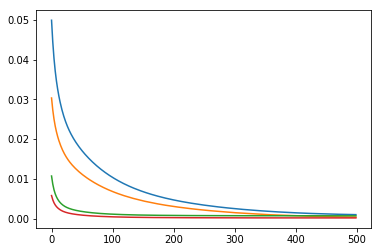

In [3]:
from matplotlib import pyplot
%matplotlib inline
# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['val_mean_squared_error'])

In [4]:
test_loss, test_mae_score, test_mse_score = model.evaluate(x_test, y_test)

print("Test MAE score:", test_mae_score)
print("Test loss:", test_loss)
print("Test MSE score:", test_mse_score)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 400 samples

In [ ]:
print(predictions[0][0])
print(np.argmax(predictions[0][0]))